## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo IV - Estratégias de Treinamento e Transferência de Aprendizado</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---


### Questão 1)

Qual a relação entre viés indutivo de algoritmos de aprendizado e redes contendo muitas camadas e muitas unidades de processamento em cada camada?

(a) Quanto mais profundas e com mais neurônios, melhor permitem memorizar todos os exemplos de treinamento, tornando-as hábeis para generalizar para dados futuros.<br>
(b) Quanto mais profundas e com mais neurônios, ampliam o espaço de funções admissíveis e assim possuem viés indutivo mais fraco<br>
(c) Quanto mais profundas e com mais neurônios, seus resultados estarão mais próximos do estado-da-arte em muitas aplicações permitindo colocá-las em produção.<br>
(d) Quanto mais profundas e com mais neurônios, reduzem o espaço de funções admissíveis e assim possuem viés indutivo mais forte.<br>

---

### Questão 2)

Considere os seguintes efeitos no treinamento de redes neurais:

I - Minimizar overfitting<br>
II - Reduzir o número de iterações necessárias para convergência do modelo<br>
III - Evitar o desaparecimento do gradiente<br>
IV - Tornar o modelo treinado mais robusto a ataques<br>

Quais desses estão associados ao uso em conjunto de métodos de regularização e aumento de dados?

(a) I, II e III<br>
(b) II e III<br>
(c) I e IV<br>
(d) I, III e IV<br>



---
### Questão 3)

A normalização de batch, camada ou instância empregadas no projeto de redes neurais profundas tem como principal efeito:

 (a) Tornar mais forte o viés indutivo dos modelos<br>
 (b) Aumentar a variabilidade no conjunto de treinamento permitindo maior robustez a ataques<br>
 (c) Acelerar o processo de treinamento do modelo<br>
 (d) Reduzir problemas com a magnitude do gradiente ao longo das camadas<br>

---

### Questão 4)

Carregue a base de dados Fashion MNIST conforme código abaixo e crie um modelo de CNN com a seguinte arquitetura, capaz de obter classificação nessa base de dados de imagens. Considere que todas as camadas convolucionais tem zeropadding, e ativação relu, exceto quando mencionado contrário.

1. Pré-processamento para aumentação contendo:
  * RandomZoom(0.1),
  * RandomContrast(0.25),
  * RandomFlip("horizontal")
1. Convolucional 2D com 128 filtros $3\times 3$.
2. MaxPooling2D $2\times 2$ e strides $2$
2. Batch Normalization
3. SeparableConv2D com 256 filtros $3\times 3$.
4. MaxPooling2D $2\times 2$ e strides $2$
5. Batch Normalization
6. SeparableConv2D com 256 filtros $3\times 3$.
7. MaxPooling2D $2\times 2$ e strides $2$
8. GlobalAveragePooling
9. Dropout de 0.33
10. Densa com ativação softmax

Realize 4 experimentos de treinamento, incializando as sementes do numpy e tensorflow para os valores: 1, 3, 5 e 7. Em cada uma, treine o modelo utilizando as primeiras 6 mil imagens (use [:6000]) por 10 épocas com batch size 16, otimizador Adam e taxa de aprendizado 0.0008. Em cada experimento, avalie o resultado da acurácia no conjunto de testes completo. A acurácia média considerando as 4 execuções recai em qual intervalo?

(a) [45,49]<br>
(b) [56,60]<br>
(c) [74,78]<br>
(d) [82,86]<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

### dados a utilizar nos experimentos
no_images = 6000
train_sub = train_images[:no_images]
labels_sub= train_labels[:no_images]

---

### Questão 5)

Realize um procedimento de extração de características de imagens conforme os seguintes passos:
1. Carregue e processe a base de dados "eurosat" do tensorflow-datasets conforme código abaixo.
2. Carregue um modelo ResNet50 pré-treinado na ImageNet sem utilizar o topo da rede. Crie um modelo extrator de características incluindo a ResNet50 carregada seguida de uma camada de Global Average Pooling para realizar extração de 2048 características da base de dados.
3. Obtenha um array com as características extraídas a partir do modelo extrator criado no passo anterior
4. Utilizando as características obtidas referentes ao conjunto de treinamento, ajuste um modelo PCA com 16 componentes. Utilize o atributo `explained_variance_ratio_` e compute a porcentagem da variância retida nesses 16 componentes (somadas).

Em qual intervalo recai a soma da porcentagem da variância retida nas 16 componentes?

(a) 3 a 8%<br>
(b) 45 a 50%<br>
(c) 76 a 81%<br>
(d) 89 a 93%<br>


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/eurosat/rgb/2.0.0.incompleteA05SQO/eurosat-train.tfrecord


  0%|          | 0/27000 [00:00<?, ? examples/s]

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


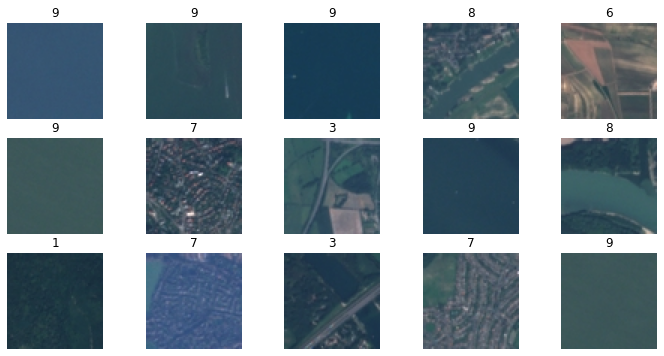

In [1]:
### Passo 1 - carregar e preparar dados
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

import tensorflow_datasets as tfds

train_ds, = tfds.load(
    "eurosat",
    split=["train[0%:30%]"],
    as_supervised=True
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# redimensionando exemplos e normalizando entre 0-1 tipo float32
img_size = (64, 64)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

input_shape = img_size+(3,)

batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)

plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(train_ds.take(15)):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image[i])
    plt.title(str(label[i].numpy()))
    plt.axis("off")

In [ ]:
### Passo 2 - carregar modelo pré-treinado e montar modelo extrator

In [ ]:
### Passo 3 - Obter características para o conjunto de treinamento e o conjunto de validação

In [ ]:
### Passo 4 - Ajustar PCA com 16 componentes e obter a porcentagem da variância explicada por meio do explained_variance_ratio_